In [14]:
import pandas as pd

subway = pd.read_csv('cleaned_4hr_entries.csv')

In [15]:
subway.head()

,Unnamed: 0,c/a,unit,scp,station,linename,division,datetime,hr4
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-03-31 00:00:00,NaN
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-03-31 04:00:00,7.0
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-03-31 08:00:00,0.0
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-03-31 12:00:00,0.0
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-03-31 16:00:00,0.0


In [16]:
subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196988 entries, 0 to 196987
Data columns (total 9 columns):
Unnamed: 0    196988 non-null int64
c/a           196988 non-null object
unit          196988 non-null object
scp           196988 non-null object
station       196988 non-null object
linename      196988 non-null object
division      196988 non-null object
datetime      196988 non-null object
hr4           189238 non-null float64
dtypes: float64(1), int64(1), object(7)
memory usage: 13.5+ MB


In [18]:
a = subway[subway.station == '1 AV']

In [19]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 30139 to 30558
Data columns (total 9 columns):
Unnamed: 0    420 non-null int64
c/a           420 non-null object
unit          420 non-null object
scp           420 non-null object
station       420 non-null object
linename      420 non-null object
division      420 non-null object
datetime      420 non-null object
hr4           410 non-null float64
dtypes: float64(1), int64(1), object(7)
memory usage: 32.8+ KB


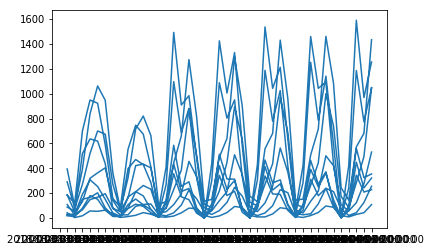

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(a.datetime, a['hr4']);

In [23]:
a['dt'] = pd.to_datetime(a['datetime'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 30139 to 30558
Data columns (total 10 columns):
Unnamed: 0    420 non-null int64
c/a           420 non-null object
unit          420 non-null object
scp           420 non-null object
station       420 non-null object
linename      420 non-null object
division      420 non-null object
datetime      420 non-null object
hr4           410 non-null float64
dt            420 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 36.1+ KB


In [25]:
a.head()

,Unnamed: 0,c/a,unit,scp,station,linename,division,datetime,hr4,dt
30139,30139,H007,R248,00-00-00,1 AV,L,BMT,2018-03-31 00:00:00,NaN,2018-03-31 00:00:00
30140,30140,H007,R248,00-00-00,1 AV,L,BMT,2018-03-31 04:00:00,87.0,2018-03-31 04:00:00
30141,30141,H007,R248,00-00-00,1 AV,L,BMT,2018-03-31 08:00:00,53.0,2018-03-31 08:00:00
30142,30142,H007,R248,00-00-00,1 AV,L,BMT,2018-03-31 12:00:00,518.0,2018-03-31 12:00:00
30143,30143,H007,R248,00-00-00,1 AV,L,BMT,2018-03-31 16:00:00,636.0,2018-03-31 16:00:00


In [26]:
a.dt[0].weekday()

KeyError: 0

In [27]:
a['weekday'] = a['dt'].apply(lambda x: x.weekday())

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
a_day = a.groupby(['STATION','LINENAME','weekday'])[['Hourly_Entries','Hourly_Exits']].sum()

In [58]:
a_day

Hourly_Entries  Hourly_Exits
STATION LINENAME weekday                              
1 AV    L        0               17825.0       19505.0
                 1               19463.0       22025.0
                 2               20295.0       21976.0
                 3               20759.0       22838.0
                 4               21637.0       23235.0
                 5               12945.0       14415.0
                 6               13367.0       14932.0

In [59]:
a_day['daily_traiffic'] = a_day.Hourly_Entries +a_day.Hourly_Exits

In [70]:
a_day = a_day.reset_index()

In [64]:
def workday_index(df):
    for row in df
    weekend = 0
    weekday = 0
    if row['weekday'] < 5:
        weekday += row['daily_traffic']
    else:
        weekend += row['daily_traffic']
        
    index = weekday/weekend * 2/5
    return index



In [88]:
a_day.columns = ['STATION', 'LINENAME', 'weekday', 'Hourly_Entries', 'Hourly_Exits',
       'daily_traffic', 'is_weekday']

In [83]:
def is_weekday(row):
    if row < 5:
        return 1
    else: 
        return 0

In [84]:
a_day['is_weekday'] = a_day['weekday'].apply(is_weekday)

In [94]:
a_day.groupby(['is_weekday'])['daily_traffic'].mean()

27829.5

In [115]:
subway['dt'] = pd.to_datetime(subway['datetime'])
subway['weekday'] = subway['dt'].apply(lambda x: x.weekday())
daily_subway = subway.groupby(['STATION','LINENAME','weekday'])[['Hourly_Entries','Hourly_Exits']].sum()

daily_subway['daily_traffic'] = daily_subway.Hourly_Entries + daily_subway.Hourly_Exits
daily_subway = daily_subway.reset_index()
daily_subway['is_weekday'] = daily_subway['weekday'].apply(is_weekday)

In [106]:
daily_subway.head()

,STATION,LINENAME,weekday,Hourly_Entries,Hourly_Exits,daily_traiffic,is_weekday
0,1 AV,L,0,17825.0,19505.0,37330.0,1
1,1 AV,L,1,19463.0,22025.0,41488.0,1
2,1 AV,L,2,20295.0,21976.0,42271.0,1
3,1 AV,L,3,20759.0,22838.0,43597.0,1
4,1 AV,L,4,21637.0,23235.0,44872.0,1


In [117]:
daily_subway['stl'] = daily_subway['STATION'] + ' ' + daily_subway['LINENAME']

In [110]:
daily_subway.head()

,STATION,LINENAME,weekday,Hourly_Entries,Hourly_Exits,daily_traiffic,is_weekday,stl
0,1 AV,L,0,17825.0,19505.0,37330.0,1,1 AV L
1,1 AV,L,1,19463.0,22025.0,41488.0,1,1 AV L
2,1 AV,L,2,20295.0,21976.0,42271.0,1,1 AV L
3,1 AV,L,3,20759.0,22838.0,43597.0,1,1 AV L
4,1 AV,L,4,21637.0,23235.0,44872.0,1,1 AV L


In [129]:
ds2 = daily_subway.groupby(['stl','is_weekday'])[['daily_traffic']].sum().reset_index()

In [132]:
ds2.head()

,stl,is_weekday,daily_traffic,idx
0,1 AV L,0,55659.0,NaN
1,1 AV L,1,209558.0,3.765034
2,103 ST 1,0,22372.0,0.106758
3,103 ST 1,1,90564.0,4.048096
4,103 ST 6,0,18203.0,0.200996


In [133]:
ds2['idx'] = ds2['daily_traffic']/ds2['daily_traffic'].shift(1)
ds2['weekly_traffic'] = ds2['daily_traffic'] + ds2['daily_traffic'].shift(1)

In [134]:
ds3 = ds2[ds2.is_weekday == 1]

In [141]:
ds3 = ds3[['stl','idx','weekly_traffic']].reset_index()

In [143]:
ds3= ds3[['stl','idx','weekly_traffic']]

In [145]:
ds3['scaled_weekday_index'] = ds3['idx']/2.5

In [146]:
ds3

,stl,idx,weekly_traffic,scaled_weekday_index
0,1 AV L,3.765034,265217.0,1.506013
1,103 ST 1,4.048096,112936.0,1.619238
2,103 ST 6,5.777674,123374.0,2.311070
3,103 ST BC,7.822340,38386.0,3.128936
4,103 ST-CORONA 7,3.669575,199120.0,1.467830
5,104 ST A,5.598851,11482.0,2.239540
6,104 ST JZ,5.003188,5649.0,2.001275
7,110 ST 6,5.366306,104261.0,2.146523
8,111 ST 7,3.634896,108540.0,1.453958
9,111 ST A,6.671571,17729.0,2.668628


In [147]:
ds3.to_csv('station_list.csv')

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([351.,  85.,  17.,   8.,   5.,   1.,   2.,   0.,   1.,   1.]),
 array([1.3190000e+03, 1.6030820e+05, 3.1929740e+05, 4.7828660e+05,
        6.3727580e+05, 7.9626500e+05, 9.5525420e+05, 1.1142434e+06,
        1.2732326e+06, 1.4322218e+06, 1.5912110e+06]),
 <a list of 10 Patch objects>)

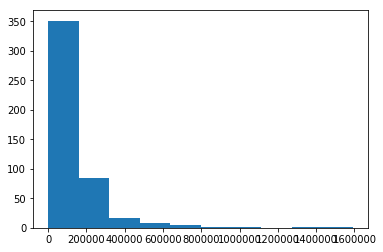

In [149]:
plt.hist(ds3['weekly_traffic'])

In [156]:
high_traffic = ds3[ds3['weekly_traffic'] > 200000]

In [157]:
high_traffic.head()

,stl,idx,weekly_traffic,scaled_weekday_index
0,1 AV L,3.765034,265217.0,1.506013
18,125 ST 456,3.078044,276993.0,1.231218
19,125 ST ACBD,3.003719,318632.0,1.201488
25,14 ST ACEL,3.748875,200488.0,1.499550
26,14 ST FLM123,2.083385,271341.0,0.833354


(array([57., 15.,  8.,  4.,  2.,  2.,  0.,  1.,  0.,  1.]),
 array([ 200488. ,  339560.3,  478632.6,  617704.9,  756777.2,  895849.5,
        1034921.8, 1173994.1, 1313066.4, 1452138.7, 1591211. ]),
 <a list of 10 Patch objects>)

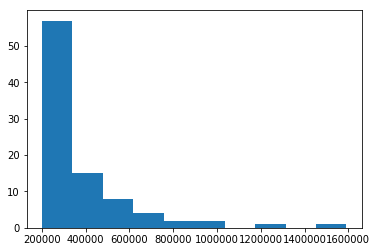

In [158]:
plt.hist(high_traffic['weekly_traffic'])

In [159]:
high_traffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 468
Data columns (total 4 columns):
stl                     90 non-null object
idx                     90 non-null float64
weekly_traffic          90 non-null float64
scaled_weekday_index    90 non-null float64
dtypes: float64(3), object(1)
memory usage: 3.5+ KB


In [169]:
high_traffic[high_traffic['scaled_weekday_index'] > 2]

,stl,idx,weekly_traffic,scaled_weekday_index
71,23 ST 6,7.037422,223585.0,2.814969
72,23 ST CE,5.093764,223568.0,2.037505
73,23 ST FM,9.858527,271246.0,3.943411
74,23 ST NRW,5.436194,216874.0,2.174478
81,28 ST 6,6.866358,246099.0,2.746543
86,33 ST 6,6.204273,290361.0,2.481709
88,34 ST-HERALD SQ BDFMNQRW,6.092626,1298901.0,2.437050
90,34 ST-PENN STA 123,8.108657,371114.0,3.243463
91,34 ST-PENN STA 123ACE,5.463861,532202.0,2.185544
98,42 ST-BRYANT PK BDFM7,10.669263,443502.0,4.267705


(array([89.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([3.85522355e-02, 5.02599943e+01, 1.00481436e+02, 1.50702878e+02,
        2.00924321e+02, 2.51145763e+02, 3.01367205e+02, 3.51588647e+02,
        4.01810089e+02, 4.52031531e+02, 5.02252973e+02]),
 <a list of 10 Patch objects>)

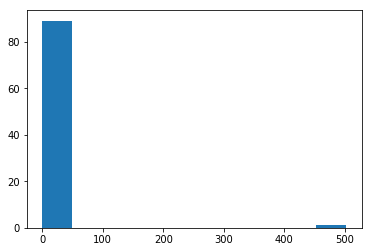

In [162]:
plt.hist(high_traffic['scaled_weekday_index'])

In [167]:
fix_high_traffic = high_traffic[high_traffic['scaled_weekday_index'] < 10]

(array([13.,  8.,  7., 22., 17.,  5.,  8.,  4.,  1.,  5.]),
 array([0.03855224, 0.47027859, 0.90200495, 1.33373131, 1.76545767,
        2.19718403, 2.62891038, 3.06063674, 3.4923631 , 3.92408946,
        4.35581582]),
 <a list of 10 Patch objects>)

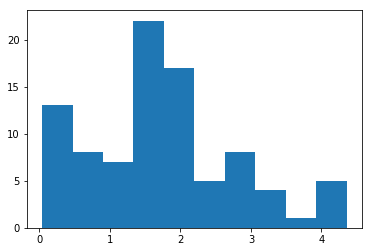

In [168]:
plt.hist(fix_high_traffic['scaled_weekday_index'])